In [1]:
import pandas as pd
import numpy as np
import requests
import json
import os
import timeit
from datetime import datetime
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import *
from bokeh.transform import jitter, transform
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
import matplotlib.pyplot as plt
import plotly.plotly as py
from bokeh.palettes import *
%matplotlib inline  


pd.set_option('display.max_colwidth', -1)
print(np.__version__)


1.12.1


In [2]:
import tweepy
consumer_key = 'VPms66InPfbslKG20cFMdOoBu'
consumer_secret = '6cu7XR4s8bo3mcucOXbLxOlhawBhIaI8obAZPS2WD3U7hnkjyl'
access_token = '936219663989649409-yeuCB7ijmVFNxlKOleINZhYIdQBgwm0'
access_secret = 'rNyjJ0bZsZqqQkgDXjA2wDcwIuLUUThuWJwvg8oHrqk13'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

api.wait_on_rate_limit = True
api.wait_on_rate_limit_notify = True

In [3]:
folder_name = 'image prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
os.getcwd()

'/home/workspace'

In [4]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, stream=True)
with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
    file.write(r.content)

os.rename('/home/workspace/image prediction/image-predictions.tsv', '/home/workspace/image-predictions.tsv')


In [5]:
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
columns = ['tweet_id', 'retweet_count', 'favorite_count']
tweet_counts = pd.DataFrame(columns=columns)


with open('tweet_json.txt', 'r') as file:
    content = file.readlines()
    for tweet in content:
        data = json.loads(tweet)
        tweet_counts = tweet_counts.append({
            'tweet_id': data['id_str'],
            'retweet_count': data['retweet_count'],
            'favorite_count': data['favorite_count']
        }, ignore_index = True)
        
    




In [7]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 3 columns):
tweet_id          2349 non-null object
retweet_count     2349 non-null object
favorite_count    2349 non-null object
dtypes: object(3)
memory usage: 55.1+ KB


In [9]:
type(tweet_counts.retweet_count[0])

int

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
img_pred.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:


# with open('tweet_json.txt', 'w') as file:
#     for tweet_id in archive['tweet_id']:
#         try:
#             status = api.get_status(tweet_id)       
#             json.dump(status._json, file)
#             file.write('\n')
#         except:
#             print("missing ", tweet_id)



In [13]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [14]:
# archive[archive.rating_denominator>10]

In [15]:
# img_pred.describe()

#### Quality
##### 'archive' table
- Tweet ID, in_reply_to_status_id, in_reply_to_user_id are integers not strings
- In the case where the rating has decimals, only the digits behind the decimal points were picked up
- Some tweets rate dogs in group and used total rating
- The wrong numbers are picked up as ratings in some tweets, e.g. 9/11, 7/11 
- Tweet 832088576586297345 has irrelevent info and the wrong ratings were picked up
- 'None' as a string is in place of null-object in columns name and all three dog types
- Words such as 'a', 'this' were recognized as names
- The plural forms of dog types were not recognized
- Retweets need to be deleted
- Timestamp is a str object not a datetime object
- Ratings should be float



##### 'img_pred' table
- Tweet ID is an integer not a string

#### Tidiness
- Dog types: doggo, pupper, puppo, floofer should be combiend into one column
- The three tables should be combined into one
- Some of the columns are irrelevant and can be dropped


In [16]:
archive_clean = archive.copy()
img_pred_clean = img_pred.copy()

In [17]:
# TRIED AND FAILED

# archive_clean['dog_type'] = np.NaN

# for i, row in archive_clean.iterrows():
#     if row['text'].find('puppo') >0 :
#         archive_clean['dog_type'] = 'puppo'
#     elif row['text'].find('pupper') >0 :
#         archive_clean['dog_type'] = 'pupper' 
#     elif row['text'].find('doggo') >0 :
#         archive_clean['dog_type'] = 'doggo'
#     elif row['text'].find('floofer') >0 :
#         archive_clean['dog_type'] = 'floofer'
#     else:
#         archive_clean['dog_type'] = np.NaN
# archive_clean.info()

##### Define:
Using a FOR loop to find each type of dogs, put each type into a list of twitter IDs. Then change the value of dog_type column for according tweets with lists of dog types.


##### Code

In [18]:
archive_clean['dog_type'] = np.NaN

puppo = []
doggo = []
pupper = []
floofer = []

for row in archive_clean.iterrows():
    if row[1]['text'].lower().find('puppo') > 0 :
        puppo.append(row[1]['tweet_id'])

puppo_mask = np.in1d(archive_clean['tweet_id'], puppo)
archive_clean.loc[puppo_mask, 'dog_type'] = 'puppo'

for row in archive_clean.iterrows():
    if row[1]['text'].lower().find('doggo') > 0 :
        doggo.append(row[1]['tweet_id'])

doggo_mask = np.in1d(archive_clean['tweet_id'], doggo)
archive_clean.loc[doggo_mask, 'dog_type'] = 'doggo'

for row in archive_clean.iterrows():
    if row[1]['text'].lower().find('pupper') > 0 :
        pupper.append(row[1]['tweet_id'])

pupper_mask = np.in1d(archive_clean['tweet_id'], pupper)
archive_clean.loc[pupper_mask, 'dog_type'] = 'pupper'

for row in archive_clean.iterrows():
    if row[1]['text'].lower().find('floofer') > 0 :
        floofer.append(row[1]['tweet_id'])

floofer_mask = np.in1d(archive_clean['tweet_id'], floofer)
archive_clean.loc[floofer_mask, 'dog_type'] = 'floofer'

archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_type                      41

##### Test

In [19]:
list(archive_clean['dog_type'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'doggo',
 nan,
 nan,
 'puppo',
 nan,
 'puppo',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'pupper',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'doggo',
 nan,
 nan,
 'floofer',
 nan,
 nan,
 'pupper',
 nan,
 nan,
 nan,
 nan,
 'pupper',
 nan,
 'pupper',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'puppo',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'pupper',
 nan,
 nan,
 nan,
 'pupper',
 'doggo',
 nan,
 'puppo',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'pupper',
 nan,
 'puppo',
 nan,
 nan,
 'pupper',
 'pupper',
 'doggo',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'puppo',
 'pupper',
 'doggo',
 nan,
 'doggo',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'doggo',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'puppo',
 nan,
 nan,
 'pupper',
 nan,
 'puppo',
 'pupper',
 nan,
 'pupper',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

##### Define
Setting all 'None' values to null

##### Code:

In [20]:
archive_clean.replace('None', np.NaN, inplace = True)

##### Test

In [21]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dog_type                      418 non-n

##### Define:
Turning timestamp into a datetime object

##### Code:

In [22]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

##### Test:

In [23]:
type(archive_clean['timestamp'][0])

pandas._libs.tslib.Timestamp

##### Define:
Checking and correcting abnormal ratings, both numerator and denominator. 

##### Code:

In [24]:
archive_clean[archive_clean.rating_denominator>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,NaN,NaN,NaN,NaN,doggo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,NaN,NaN,NaN,NaN,pupper
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofol

Identify the rows where dogs are rated in groups. Programatically correct all of them

In [25]:
group_dog_list = [433, 902, 1120, 1202, 1228, 1254, 1274, 1351, 1433, 1634, 1635, 1779, 1843]

for id in group_dog_list:
    num_dog = archive_clean.at[id,'rating_denominator']/10
    archive_clean.at[id,'rating_numerator'] = archive_clean.at[id,'rating_numerator']/num_dog
    archive_clean.at[id,'rating_denominator'] = archive_clean.at[id,'rating_denominator']/num_dog




Fixing the remaining mistaken inputs one by one:

In [26]:
archive_clean[archive_clean.rating_denominator>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,NaN,NaN,NaN,NaN
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN,NaN,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,NaN,NaN,NaN,NaN,NaN
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
archive_clean.at[784,'rating_numerator'], archive_clean.at[784,'rating_denominator'] = 14,10
archive_clean.at[1068,'rating_numerator'], archive_clean.at[1068,'rating_denominator'] = 14,10
archive_clean.at[1165,'rating_numerator'], archive_clean.at[1165,'rating_denominator'] = 13,10
archive_clean.at[1662,'rating_numerator'], archive_clean.at[1662,'rating_denominator'] = 10,10


 Dropping the rest of the abnormal ratings

In [28]:
archive_clean[archive_clean.rating_denominator>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN,NaN
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,NaN,NaN,NaN,NaN,NaN,NaN
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,NaN,NaN,NaN,NaN,NaN,NaN


Checking for abnormal numerators by setting the threshold at 14

In [29]:
archive_clean[archive_clean.rating_numerator>14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,NaN,NaN,NaN,NaN,NaN,NaN
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,NaN,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,NaN,NaN,NaN,NaN,NaN,NaN
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,NaN,NaN,NaN,NaN,NaN,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,NaN,NaN,NaN,NaN,NaN,NaN
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,NaN,NaN,NaN,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,NaN,NaN,NaN,NaN


 Manually fix the ratings that are not integers 

In [30]:
archive_clean.at[55,'rating_numerator'] = 13
archive_clean.at[695,'rating_numerator'] = 9.75
archive_clean.at[763,'rating_numerator'] = 11.27
archive_clean.at[1712,'rating_numerator'] = 11.26
archive_clean.at[340,'rating_numerator'] = 9.75


In [31]:
archive_clean[archive_clean.rating_numerator>14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,NaN,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,NaN,NaN,NaN,NaN,NaN,NaN
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,NaN,NaN,NaN,NaN,NaN,NaN
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,NaN,NaN,NaN,NaN,NaN,NaN
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,NaN,NaN,NaN,NaN,15,10,NaN,NaN,NaN,NaN,NaN,NaN
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN,NaN
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN,NaN,NaN,NaN,NaN
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,NaN,NaN,NaN,NaN,NaN,NaN
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,NaN,NaN,NaN,NaN,NaN,NaN


Drop retweets: row 188, 189, 285, 290, 291, 313, 342, 516, 979, 1663, 2074

In [32]:
archive_clean.drop(archive_clean.index[[188, 189, 285, 290, 291, 313, 342, 516, 979, 1598, 1663, 2074]], inplace = True)

Resetting index and checking if any other denominator is not 10  

In [33]:
archive_clean.reset_index()
archive_clean[archive_clean.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,NaN,NaN,NaN,NaN,NaN


In [34]:
archive_clean.at[2335,'rating_numerator'], archive_clean.at[2335,'rating_denominator'] = 9,10

##### Test:

In [35]:
archive_clean[archive_clean.rating_numerator>14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


In [36]:
archive_clean[archive_clean.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


##### Define:
Dropping retweets

##### Code:

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2344 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2344 non-null datetime64[ns]
source                        2344 non-null object
text                          2344 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2293 non-null object
rating_numerator              2344 non-null int64
rating_denominator            2344 non-null int64
name                          1609 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dog_type                      4

In [38]:
archive_clean = archive_clean[np.isnan(archive_clean.retweeted_status_id)]

##### Test:

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2164 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2164 non-null datetime64[ns]
source                        2164 non-null object
text                          2164 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2114 non-null object
rating_numerator              2164 non-null int64
rating_denominator            2164 non-null int64
name                          1493 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dog_type                      380 non

##### Define: 
Turn Tweet ID into str in both archive_clean and img_pred

##### Code:

In [40]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)

##### Test:

In [41]:
type(archive_clean['tweet_id'][0])

str

In [42]:
type(img_pred_clean['tweet_id'][0])

str

##### Define:
Turn rating numerators and demoninators into floats

##### Code:

In [43]:
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)

##### Test:

In [44]:
type(archive_clean.rating_denominator[0])

numpy.float64

##### Define:
Combine tables: archive and tweet_count

##### Code: 

In [45]:
new_df = pd.merge(archive_clean, tweet_counts, on='tweet_id')

##### Test:

In [46]:
new_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,8789,39345
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,NaN,6444,33676
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN,NaN,4271,25368
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN,NaN,8878,42726
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN,NaN,9657,40878


##### Define:
Dropping irrelevant columns 'in_reply_to_status_id',  'in_reply_to_user_id',  'retweeted_status_id',  'retweeted_status_user_id',  'retweeted_status_timestamp',  'doggo',  'floofer',  'pupper',  'puppo'

##### Code:

In [47]:
new_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
             'retweeted_status_id', 'retweeted_status_user_id', 
             'retweeted_status_timestamp', 'doggo', 
             'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


##### Test:

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2163
Data columns (total 11 columns):
tweet_id              2164 non-null object
timestamp             2164 non-null datetime64[ns]
source                2164 non-null object
text                  2164 non-null object
expanded_urls         2114 non-null object
rating_numerator      2164 non-null float64
rating_denominator    2164 non-null float64
name                  1493 non-null object
dog_type              380 non-null object
retweet_count         2164 non-null object
favorite_count        2164 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 202.9+ KB


##### Define:
Combining tables: new_df with img_pred

##### Code:

In [49]:
new_df = pd.merge(new_df, img_pred_clean, on='tweet_id')

##### Test:

In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 22 columns):
tweet_id              1991 non-null object
timestamp             1991 non-null datetime64[ns]
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
name                  1446 non-null object
dog_type              340 non-null object
retweet_count         1991 non-null object
favorite_count        1991 non-null object
jpg_url               1991 non-null object
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 

##### Define:
Cleaning up the 'name' column, removing words such as 'a', 'such'

##### Code:

In [51]:
wrong_name = []
new_df.reset_index()

for i in range(0,len(new_df)):
    try:
        if new_df['name'][i].istitle():
            pass
        else:
            wrong_name.append(new_df['tweet_id'][i])
    except:
        pass

wrong_name_mask = np.in1d(new_df['tweet_id'], wrong_name)
new_df.loc[wrong_name_mask, 'name'] = np.NaN 

##### Test:

In [52]:
new_df['name'].tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 nan,
 'Jax',
 nan,
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 nan,
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 nan,
 'Canela',
 nan,
 nan,
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 nan,
 'Earl',
 'Lola',
 'Kevin',
 nan,
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 nan,
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 nan,
 'Elliot',
 'Louis',
 nan,
 'Bella',
 'Jesse',
 nan,
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 nan,
 'Cash',
 'Jed',
 nan,
 'Sebastian',
 nan,
 'Sierra',
 nan,
 nan,
 'Monkey',
 nan,
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 nan,
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',
 'Walter',
 nan,
 'Cooper',
 nan,
 'Harold',
 'Shikha

#### Questions to answer:
- ratings vs dog types (hist)?
- ratings vs retweet (scatter)
- ratings vs like (scatter)
- like vs retweet (scatter)
- time of the day vs retweets/likes
- What breeds of dogs are most favorited? 
- 

In [53]:
new_df.to_csv('twitter_archive_master.csv', sep = '\t', index=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7eff205aed68>],
 'caps': [<matplotlib.lines.Line2D at 0x7eff2091ad30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff205a45c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7eff2091ac88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff205a6518>,
  <matplotlib.lines.Line2D at 0x7eff205a6cc0>]}

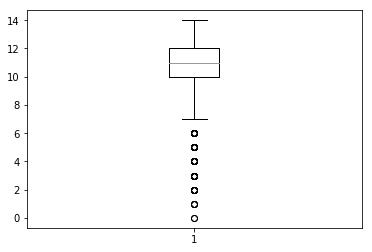

In [54]:
fig = plt.figure()
plt.boxplot(x = new_df['rating_numerator'])

In [55]:
output_file("rating_vs_retweet.html")

p = figure(plot_width = 800, plot_height=600)
p.circle(x = new_df['rating_numerator'], y = new_df['retweet_count'], size = 5, color = 'olive', alpha = 0.3)
p.xaxis.axis_label = 'Ratings'
p.yaxis.axis_label = 'Retweet Count'

show(p)

In [56]:
output_file("favorite_vs_retweet.html")

p = figure(plot_width = 800, plot_height=600)
p.circle(x = new_df['favorite_count'], y = new_df['retweet_count'], size = 5, color = 'teal', alpha = 0.3)
p.xaxis.axis_label = 'Favorite Count'
p.yaxis.axis_label = 'Retweet Count'

show(p)

In [57]:
output_file("Ratings_vs_Favorite_Count.html")

p = figure(plot_width = 800, plot_height=600)
p.circle(new_df['rating_numerator'], new_df['favorite_count'], size = 5, color = 'teal', alpha = 0.3)
p.xaxis.axis_label = 'Ratings'
p.yaxis.axis_label = 'Favorite Count'

show(p)

Text(0,0.5,'Counts')

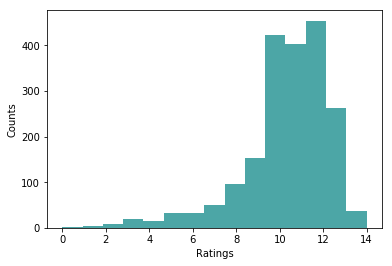

In [58]:
fig = plt.figure()
plt.hist(new_df['rating_numerator'], bins = 15, color = 'teal',alpha=0.7)
plt.xlabel('Ratings')
plt.ylabel('Counts')


In [59]:
type_sorted = new_df.groupby('p1').count().sort_values('p2', ascending=False).head(10)

output_file("Sorted_by_breeds.html")
p = figure(x_range = type_sorted.index.tolist(), plot_width = 800, plot_height=600)
p.vbar(x = type_sorted.index, top = type_sorted['tweet_id'], width = 0.5, color = 'teal', alpha = 0.7)
p.xaxis.major_label_orientation = 0.5

show(p)

In [60]:
new_df['retweet_count'] =  new_df['retweet_count'].astype(float)
new_df['favorite_count'] =  new_df['favorite_count'].astype(float)

In [61]:
type_sorted_mean = new_df[new_df['p1_dog']==True].groupby('p1').mean().sort_values('retweet_count', ascending=False).head(15)

output_file("Top_Retweeted_Breed.html")
p = figure(x_range = type_sorted_mean.index.tolist(), plot_width = 800, plot_height=600)
p.vbar(x = type_sorted_mean.index, top = type_sorted_mean['retweet_count'], width = 0.5, color = 'teal', alpha = 0.7)
p.xaxis.major_label_orientation = 0.5

show(p)

In [62]:
type_sorted_mean_fav = new_df[new_df['p1_dog']==True].groupby('p1').mean().sort_values('favorite_count', ascending=False).head(15)

output_file("Top_Favorited_Breed.html")
p = figure(x_range = type_sorted_mean_fav.index.tolist(), plot_width = 800, plot_height=600)
p.vbar(x = type_sorted_mean_fav.index, top = type_sorted_mean_fav['favorite_count'], width = 0.5, color = 'teal', alpha = 0.7)
p.xaxis.major_label_orientation = 0.5

p.xaxis.axis_label = 'Breeds'
p.yaxis.axis_label = 'Average Favorites'
p.title.text = "Top Favorited Breeds"
p.title.text_font_size = "25px"


show(p)

In [63]:
breed_sorted = new_df[new_df['p1_dog']==True].groupby('p1').count().sort_values('p2', ascending=False).head(20)
top_tweeted_breeds = breed_sorted.index.tolist()

In [64]:
top_breed_sorted_mean = new_df[new_df['p1'].isin(top_tweeted_breeds)].groupby('p1').mean()
top_breed_sorted_mean = pd.concat([top_breed_sorted_mean, breed_sorted], axis=1)
top_breed_sorted_mean

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,...,jpg_url,img_num,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
Chesapeake_Bay_retriever,10.782609,10.0,2817.826087,10516.956522,1.347826,0.544114,1.0,0.140189,0.826087,0.063596,...,23,23,23,23,23,23,23,23,23,23
Chihuahua,10.708861,10.0,2841.253165,8721.316456,1.253165,0.588905,1.0,0.114164,0.772152,0.062240,...,79,79,79,79,79,79,79,79,79,79
Eskimo_dog,11.777778,10.0,4718.444444,11910.944444,1.222222,0.451885,1.0,0.266405,0.944444,0.106705,...,18,18,18,18,18,18,18,18,18,18
French_bulldog,11.269231,10.0,4634.153846,17795.538462,1.115385,0.770627,1.0,0.102689,0.884615,0.030905,...,26,26,26,26,26,26,26,26,26,26
German_shepherd,11.000000,10.0,2628.800000,10082.550000,1.250000,0.719445,1.0,0.144703,1.000000,0.050322,...,20,20,20,20,20,20,20,20,20,20
Labrador_retriever,11.126316,10.0,3820.073684,11744.157895,1.147368,0.659139,1.0,0.138887,0.905263,0.052912,...,95,95,95,95,95,95,95,95,95,95
Maltese_dog,9.722222,10.0,1244.055556,2959.666667,1.277778,0.667731,1.0,0.105158,0.833333,0.054055,...,18,18,18,18,18,18,18,18,18,18
Pembroke,11.443182,10.0,3154.579545,11234.068182,1.261364,0.717223,1.0,0.139614,0.931818,0.041300,...,88,88,88,88,88,88,88,88,88,88
Pomeranian,11.131579,10.0,2847.921053,8074.552632,1.342105,0.743606,1.0,0.103489,0.894737,0.037442,...,38,38,38,38,38,38,38,38,38,38
Samoyed,11.700000,10.0,4573.525000,13485.225000,1.175000,0.747088,1.0,0.103486,0.800000,0.041584,...,40,40,40,40,40,40,40,40,40,40


In [65]:

output_file("Top_Favorited_Breed_retweets.html")
p = figure(x_range = top_breed_sorted_mean.index.tolist(), plot_width = 800, plot_height=600)

p.vbar(x = top_breed_sorted_mean.index, top = top_breed_sorted_mean['retweet_count'], width = 0.5, 
       color='olive')
p.xaxis.major_label_orientation = 0.5

p.xaxis.axis_label = 'Breeds'
p.yaxis.axis_label = 'Average Retweets'
p.title.text = "Top Tweeted Breeds Ranked By Mean Retweets"
p.title.text_font_size = "25px"

show(p)


In [66]:
top_breed_sorted_mean_fav = new_df[new_df['p1'].isin(top_tweeted_breeds)].groupby('p1').mean().sort_values('favorite_count', ascending=False).head(15)

output_file("Top_Favorited_Breed_Ranked_Fav.html")

p = figure(x_range = top_breed_sorted_mean_fav.index.tolist(), plot_width = 800, plot_height=600)
p.vbar(x = top_breed_sorted_mean_fav.index, top = top_breed_sorted_mean_fav['favorite_count'], width = 0.5, color = 'teal', alpha = 0.7)
p.xaxis.major_label_orientation = 0.5
p.xaxis.axis_label = 'Breeds'
p.yaxis.axis_label = 'Average Favorites'
p.title.text = "Top Tweeted Breeds Ranked By Mean Favorite"
p.title.text_font_size = "25px"


show(p)